# **Project Kyselova Maria**
# **A02** 

In [1]:
import math
from random import randrange
from functools import cmp_to_key

"""1. Для заданої множини точок побудувати опуклу оболонку за 
методом Грехема."""


# A class used to store the x and y coordinates of points
class Point:
  def __init__(self, x = None, y = None):
    self.x = x
    self.y = y
  
  def get(self):
    x, y = self.x, self.y
    return x,y

  def set(self, x, y):
    self.x, self.y = x, y

  def print(self):
    print("(" + str(self.x) + ", " + str(self.y) + ")")

special = None
eps = 0.01

#find first point
def find_min(points):
   p_min = points[0]
   for p in points:
      if p.y < p_min.y:
         p_min = p
      elif p.y == p_min.y and p.x < p_min.x:
            p_min = p
   
   return p_min

# A utility function to return square of distance
# between p1 and p2
def distSq(p1, p2):
  return (p1.x - p2.x) * (p1.x - p2.x) + (p1.y - p2.y) * (p1.y - p2.y)

def dist(point, p2=None):
  if p2 == None:
    p2 = special      
  return math.sqrt((p2.x - point.x) * (p2.x - point.x) + (p2.y - point.y) * (p2.y - point.y))

def find_angle(point, p2=None):
  global special
  if p2==None:
    p2=special
  y_span=point.y-p2.y
  x_span=point.x-p2.x
  return math.atan2(y_span,x_span)

def determinant(p1, p2, p3):
  v1 = (p2.x - p1.x, p2.y - p1.y)
  v2 = (p3.x - p2.x, p3.y - p2.y)
  answer = v1[0]*v2[1] - v1[1]*v2[0]
  return answer

def qsort(points):
  if len(points) <= 1:
    return points
  a = 0
  b = len(points)-1
  pivot_angle = find_angle(points[a + (b - a)//2])
  smaller = []
  equal = []
  larger = []
  for point in points:
    point_angle = find_angle(point)
    if point_angle < pivot_angle:
      smaller.append(point)
    elif point_angle == pivot_angle:
      equal.append(point)
    else:
      larger.append(point)
  
  return qsort(smaller) +sorted(equal, key=dist) +qsort(larger)

# Prints convex hull of a set of n points.
def convexHull(points):
  global special
  p_min = find_min(points)
  special = p_min
  points = qsort(points)
  points.remove(p_min)
  hull=[p_min,points[0]]
  for s in points[1:]:
    while determinant(hull[-2],hull[-1],s)<=0:
      del hull[-1]
    hull.append(s)
  return hull


In [2]:
"""2. Серед точок, які є вершинами побудованої в п. 1 опуклої
оболонки, є найвіддаленіша пара. Назвемо ці дві точки базовими"""


def area(p1,p2,p3):
  return abs((p1.x*(p2.y - p3.y) + p2.x*(p3.y - p1.y) + p3.x*(p1.y - p2.y))/2)
 
def max_distance(hull):
  N=len(hull)
  k=0
  while k<N:
    curArea=area(hull[0],hull[N-1],hull[k])
    nxtArea=area(hull[0],hull[N-1],hull[k+1])
    if curArea>nxtArea:
      break;
    k+=1
  p=0
  q=k
  answer=math.sqrt(distSq(hull[p],hull[q]))
  base_points=(hull[p],hull[q])
  while p<=k and q<N:
    while q<N:
      curArea=area(hull[p],hull[p+1],hull[q])
      nxtArea=area(hull[p],hull[p+1],hull[(q+1)%N])
      if curArea>nxtArea:
        break;
      q+=1
      if math.sqrt(distSq(hull[p],hull[q%N]))>answer:
        answer=math.sqrt(distSq(hull[p],hull[q%N]))
        base_points=(hull[p],hull[q%N])
    p+=1
  
  return base_points



"""3. Для кожної з n-2 точок (дві виключені точки – базові) виконується пошук кута, що утворений базовими та поточною (однією з 
n-2) точками. Звісно, ідеться про кут при поточній вершині.
   4. Серед знайдених у п.3 кутів необхідно вибрати три найгостріші кути і відповідні до них точки."""


def get_angle(p1, p2, p3):
   v1 = (p1.x - p2.x, p1.y - p2.y)
   v2 = (p3.x - p2.x, p3.y - p2.y)
   scalar_mul = v1[0]*v2[0] + v1[1]*v2[1]
   mod_v1 = math.sqrt(v1[0]**2 + v1[1]**2)
   mod_v2 = math.sqrt(v2[0]**2 + v2[1]**2)
   cos_point = scalar_mul/(mod_v1*mod_v2)
   return math.acos(cos_point)
  
MAX = 361
def find_3_min_angles(hull,base_points):
  angles=[]
  hull.remove(base_points[0])
  hull.remove(base_points[1])
  for p in hull:
    angles.append(get_angle(base_points[0],p,base_points[1]))
  first = MAX
  second = MAX
  third = MAX
  first_ind = 0
  third_ind = 0
  sec_ind = 0
  for i in range(len(angles)):
    if first > angles[i]:
      third = second
      second = first
      first = angles[i]
      first_ind = i 
        
    elif second > angles[i]:
      third = second;
      second = angles[i]
      sec_ind = i
        
    elif third > angles[i]:
      third = angles[i]
  third_ind = angles.index(third) #O(n)
  return hull[first_ind],hull[sec_ind],hull[third_ind]

#Time Complexity: O(n)



""" 5. Перебрати всі можливі комбінації базових точок і точок, 
знайдених у п. 4. Потужність множини точок для перебирання
не буде залежати від n. До того ж можливих варіантів завжди 
буде 10.!!! Для кожного варіанта набору точок будуємо коло."""

def circle_param(p1,p2,p3):
  A = p1.x * (p2.y - p3.y) - p1.y * (p2.x - p3.x) + p2.x * p3.y - p3.x * p2.y
  B = (p1.x ** 2 + p1.y ** 2) * (p3.y - p2.y) + (p2.x ** 2 + p2.y ** 2) * (p1.y - p3.y) + (p3.x ** 2 + p3.y ** 2) * (p2.y - p1.y)
  C = (p1.x ** 2 + p1.y ** 2) * (p2.x - p3.x) + (p2.x ** 2 + p2.y ** 2) * (p3.x - p1.x) + (p3.x ** 2 + p3.y ** 2) * (p1.x - p2.x)
  D =  (p1.x ** 2 + p1.y ** 2) * (p3.x * p2.y - p2.x * p3.y) + (p2.x ** 2 + p2.y ** 2) * (p1.x * p3.y - p3.x * p1.y)+(p3.x ** 2 + p3.y ** 2) * (p2.x * p1.y - p1.x * p2.y)
  
  return A,B,C,D
        
def circle_center(l):
  p1,p2,p3=l
  A,B,C,D = circle_param(p1,p2,p3)
  if A ==0:
    largest_d=(p1,p2)
    radsq=[(p1,p2), (p3,p2), (p1,p3)]
    for d in radsq:
      if distSq(d[0],d[1]) > distSq(largest_d[0],largest_d[1]):
        largest_d = d
    return Point((largest_d[0].x + largest_d[1].x)/2,(largest_d[0].y + largest_d[1].y)/2)
  else:
    return Point(-B / A / 2, -C / A / 2)

def circle_radius(l):
  p1,p2,p3=l
  A,B,C,D = circle_param(p1,p2,p3)
  if A ==0:
    largest_d=(p1,p2)
    radsq=[(p1,p2), (p3,p2), (p1,p3)]
    for d in radsq:
      if distSq(d[0],d[1]) > distSq(largest_d[0],largest_d[1]):
        largest_d = d
    return (math.sqrt(distSq(largest_d[0],largest_d[1])))/2
  else:
    return math.sqrt((B * B + C * C - 4 *A * D)/(4 * A * A))

def build_all_crcls(three_points,base_points):
  res=[]
  res2=[]
  n1=three_points[0],three_points[1],three_points[2]
  n2=three_points[0], base_points[0],base_points[1]
  n3=three_points[1],base_points[0],base_points[1]
  n4=three_points[2],base_points[0],base_points[1]
  n5=three_points[0],three_points[1],base_points[1]
  n6=three_points[0],three_points[1],base_points[0]
  n7=three_points[0],three_points[2],base_points[0]
  n8=three_points[0],three_points[2],base_points[1]
  n9=three_points[1],three_points[2],base_points[0]
  n10=three_points[1],three_points[2],base_points[1]
  nbr=[n1,n2,n3,n4,n5,n6,n7,n8,n9,n10]
  for i in range(len(nbr)):
    res.append(circle_center(nbr[i]))
    res2.append(circle_radius(nbr[i]))
  return res, res2
    


"""6. Для побудованих у п. 4 кіл перевіряємо на приналежність 
їм усі n вхідних точок """


def check_circles(circles,points):
  update_circles=[]
  update_circles2=[]
  for i in range(len(circles[0])):
    flag = 0
    for p in points:
      if math.sqrt(distSq(circles[0][i],p)) > circles[1][i]:
        flag = 1
    if flag != 1:
      update_circles.append(circles[0][i])
      update_circles2.append(circles[1][i])
                
  return update_circles, update_circles2



"""7. Серед кіл, що успішно пройшли перевірку, з п.6 вибираємо коло найменшої площі. """


def final_circle(res):
  min1=res[1][0]
  ind=0
  for i in range(len(res[1])):
    if res[1][i] <= min1:
      min1 = res[1][i]
      ind = i
      
  return res[0][ind].get(), res[1][ind]


Input points (blue): [(609795, 561033), (775124, -500598), (18384, 84074), (16520, 332248), (-348747, -24934), (-166126, -409511), (845877, 152722), (964521, -217081), (800889, -837922), (33770, -560377), (953367, 308168), (510820, 330697), (-164300, -757394), (76023, 10571), (717614, 235095), (968699, 821343), (254502, 408949), (-433310, 711073), (469024, 45065), (384552, -671909), (-191932, 567616), (-364181, 416270), (846428, 402140), (-272821, -198912), (47659, 853983), (-417034, -409327), (-206550, 16460), (586720, 626837), (721519, -158397), (940260, 34374), (611517, 696139), (402903, -522287), (746065, -36416), (-190147, 793725), (458594, 516017), (-248417, 672755), (748374, 552675), (407160, 453849), (137474, 299531), (-489910, 335625), (-409558, -833845), (826245, -793534), (301901, -342137), (-413392, -234445), (627816, -452396), (-30401, 442225), (-220710, 522923), (226730, 362953), (611882, -900427), (839307, -810205), (47116, -61423), (-446945, -738812), (-4110, 188728), (

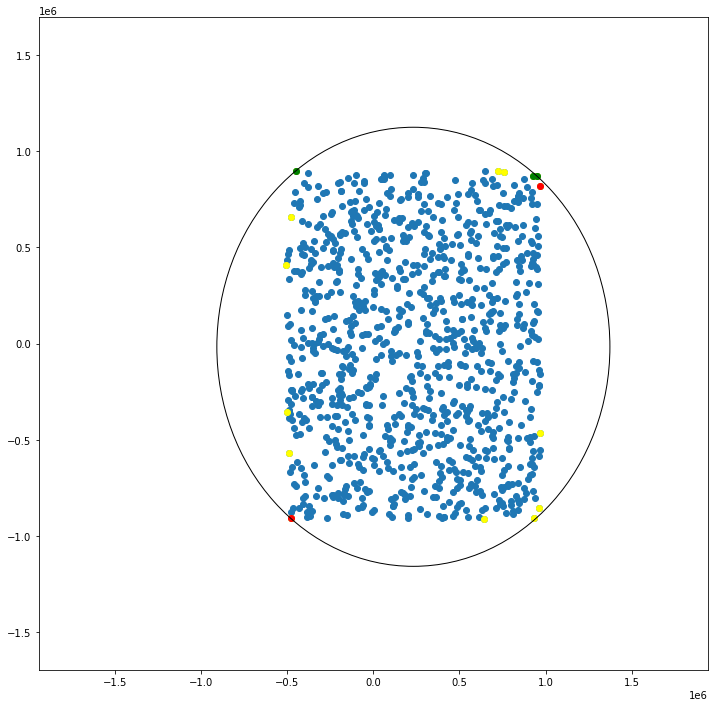

Input points (blue): [(-4, 4), (5, 1), (4, -2), (-6, -4), (-6, 2), (-6, -2), (-4, -2), (0, 3), (-3, -2), (-2, 5)]

Convex Hull (yellow):
 [(-6, -4), (4, -2), (5, 1), (-2, 5), (-4, 4), (-6, 2)]

Antipodal pair of points (red): (-6, -4) , (5, 1)

Three_points (green):
(-2, 5)
(-6, 2)
(-4, 4)

Circles:
(0.5, -2.5)
7.905694150420948
(-0.7531645569620253, -0.9430379746835443)
6.072421180266269
(-0.7272727272727273, -1.0)
6.066436589346499
(-0.6923076923076923, -1.0769230769230769)
6.059370951787071
(-0.7162162162162162, -0.8783783783783784)
6.016928881322483
(-0.625, -1.0)
6.155536126122565
(-0.14285714285714285, -1.2142857142857142)
6.48585588265822
(-0.5, -0.5)
5.70087712549569
(-1.0, -1.0)
5.830951894845301
(-0.75, -1.25)
6.174544517614234

Update Circles:
(0.5, -2.5)
7.905694150420948
(-0.625, -1.0)
6.155536126122565

Circle with the lowest square which cover all points:
Center: (-0.625, -1.0)
Radius: 6.155536126122565


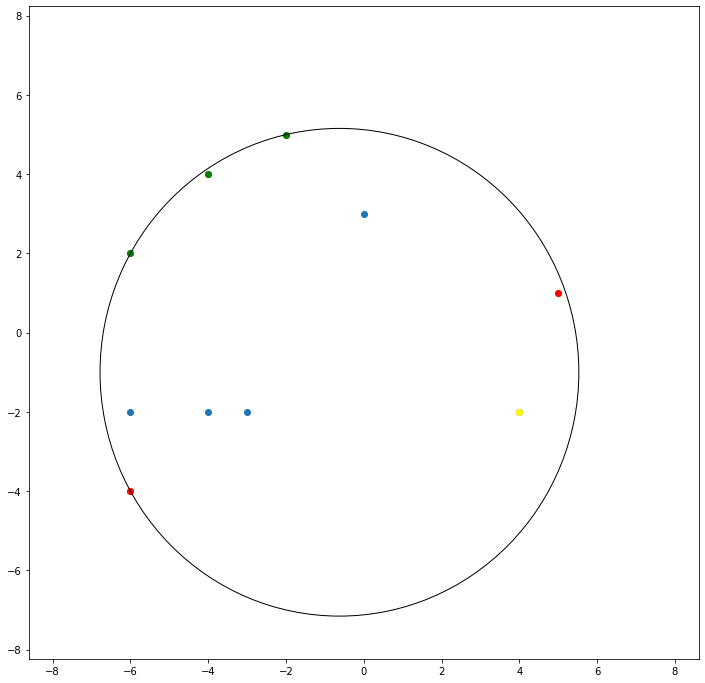

In [10]:
"""Запуск програми"""
import matplotlib.pyplot as plt

def program_launch(input_points):
  figure, axes = plt.subplots(figsize=(12, 12)) 
  print("Input points (blue):",input_points)
  points = []
  for point in input_points:
    points.append(Point(point[0], point[1]))

  px0=[]
  py0=[]
  for p in points:
    px0.append(p.get()[0])
    py0.append(p.get()[1])
  plt.scatter(px0,py0)
  
  hull=convexHull(points)
  CH=[]
  for p in hull:
    CH.append(p.get())
  print("\nConvex Hull (yellow):\n",CH)
  px=[]
  py=[]
  for p in hull:
    px.append(p.get()[0])
    py.append(p.get()[1])
  plt.scatter(px,py,color='yellow')

  base_points=max_distance(hull)
  print("\nAntipodal pair of points (red):",base_points[0].get(),",",base_points[1].get()) 
  px2=[]
  py2=[]
  for p in base_points:
    px2.append(p.get()[0])
    py2.append(p.get()[1])
  plt.scatter(px2,py2,color='red')

  three_points=find_3_min_angles(hull,base_points)
  print("\nThree_points (green):")
  three_points[0].print()
  three_points[1].print()
  three_points[2].print()
  px3=[]
  py3=[]
  for p in three_points:
    px3.append(p.get()[0])
    py3.append(p.get()[1])
  plt.scatter(px3,py3,color='green')

  circles=build_all_crcls(three_points,base_points)
  
  print("\nCircles:")
  for i in range(len(circles[0])):
    circles[0][i].print()
    print(circles[1][i])
    """Drawing_circle = plt.Circle(circles[0][i].get(),
                                      circles[1][i],
                                      fill = False )
    axes.add_artist( Drawing_circle )
  """

  update_circles=check_circles(circles,points)
 
  print("\nUpdate Circles:")
  for i in range(len(update_circles[0])):
    update_circles[0][i].print()
    print(update_circles[1][i])
  
  if len(update_circles[0])!=0:
    print("\nCircle with the lowest square which cover all points:\n" + "Center: " + str(final_circle(update_circles)[0]) + "\nRadius: "  + str(final_circle(update_circles)[1]))
    Drawing_circle = plt.Circle(final_circle(update_circles)[0],
                                          final_circle(update_circles)[1],
                                          fill = False )
    axes.add_artist( Drawing_circle )
    plt.xlim(-(final_circle(update_circles)[0][0]+1.5*final_circle(update_circles)[1]), 
            (final_circle(update_circles)[0][0]+1.5*final_circle(update_circles)[1]))  
    plt.ylim(-(final_circle(update_circles)[0][1]+1.5*final_circle(update_circles)[1]), 
            (final_circle(update_circles)[0][1]+1.5*final_circle(update_circles)[1])) 
    plt.show()

"""#Ввід точок вручну
n=int(input("Введіть кількість точок:"))
input_points = []
for i in range (n):
    x = float(input('x = '))
    y = float(input('y = '))
    input_points.append((x,y))
print(input_points)"""

"""#генерація множини точок
input_points=[]
for i in range (1000):
    x = randrange(-506700,970810)
    y = randrange(-910030,900001)
    input_points.append((x,y))
program_launch(input_points)"""

input_points2 = [(-4, 4), (5, 1), (4, -2), (-6, -4), (-6, 2), (-6, -2), (-4, -2), (0, 3), (-3, -2), (-2, 5)]
program_launch(input_points2)
